In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import seaborn as sns

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid']= False


In [ ]:
df = pd.read_csv('/content/PM2.5_Cancer_COPD.csv')

In [ ]:
# Get unique values for the 'County' column
unique_counties = df['County'].unique()
print(unique_counties)

['ACADIA' 'ALLEN' 'ASCENSION' 'ASSUMPTION' 'AVOYELLES' 'BEAUREGARD'
 'BIENVILLE' 'BOSSIER' 'CADDO' 'CALCASIEU' 'CALDWELL' 'CAMERON'
 'CATAHOULA' 'CLAIBORNE' 'CONCORDIA' 'DE SOTO' 'EAST BATON ROUGE'
 'EAST CARROLL' 'EAST FELICIANA' 'EVANGELINE' 'FRANKLIN' 'GRANT' 'IBERIA'
 'IBERVILLE' 'JACKSON' 'JEFFERSON' 'JEFFERSON DAVIS' 'LAFAYETTE'
 'LAFOURCHE' 'LINCOLN' 'LIVINGSTON' 'MADISON' 'MOREHOUSE' 'NATCHITOCHES'
 'ORLEANS' 'OUACHITA' 'PLAQUEMINES' 'POINTE COUPEE' 'RAPIDES' 'RED RIVER'
 'RICHLAND' 'SABINE' 'TANGIPAHOA' 'TENSAS' 'TERREBONNE' 'UNION'
 'VERMILION' 'VERNON' 'WASHINGTON' 'WEBSTER' 'WEST BATON ROUGE'
 'WEST CARROLL' 'WEST FELICIANA' 'WINN']


In [ ]:
df

,CountyFIPS_Year,County,PM2.5Value,Year,CancerRate,CancerCount,TotalPopulation,COPDCount
0,22001_2010,ACADIA,9.7,2010,78.9,54,61876,246
1,22001_2011,ACADIA,9.4,2011,80.9,54,61872,206
2,22003_2010,ALLEN,9.6,2010,73.8,20,25704,87
3,22001_2012,ACADIA,9.5,2012,77.6,53,62007,231
4,22001_2013,ACADIA,9.4,2013,86,58,62310,214
...,...,...,...,...,...,...,...,...
535,22127_2015,WINN,9.1,2015,^,^,14646,39
536,22127_2016,WINN,8.9,2016,^,^,14539,48
537,22127_2017,WINN,9.2,2017,^,^,14355,52
538,22127_2018,WINN,9.6,2018,106.3,22,14132,53


In [ ]:
df.query('CancerCount!=CancerCount').count()

County             124
PM2.5Value         124
Year               124
CancerRate         124
CancerCount          0
TotalPopulation    124
COPDCount          114
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountyFIPS_Year  540 non-null    object 
 1   County           540 non-null    object 
 2   PM2.5Value       540 non-null    float64
 3   Year             540 non-null    int64  
 4   CancerRate       540 non-null    object 
 5   CancerCount      540 non-null    object 
 6   TotalPopulation  540 non-null    int64  
 7   COPDCount        540 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.9+ KB


In [ ]:
df['data'] = pd.to_datetime(df['date'],infer_datetime_format=True)

<ipython-input-5-bc0220dabc62>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['data'] = pd.to_datetime(df['date'],infer_datetime_format=True)


In [ ]:
df.isnull().any()

CountyFIPS_Year    False
County             False
PM2.5Value         False
Year               False
CancerRate         False
CancerCount        False
TotalPopulation    False
COPDCount          False
dtype: bool

In [ ]:
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame with columns 'CountyFIPS_Year', 'Year', 'PM2.5Value', 'CancerCount', 'COPDCount', 'TotalPopulation'

# Replace 'Suppressed', '^', and NaN with NaN in 'COPDCount' column
df['COPDCount'] = df['COPDCount'].replace(['Suppressed', '^', np.nan], pd.NA)

# Replace 'Suppressed', '^', and NaN with NaN in 'CancerCount' column
df['CancerCount'] = df['CancerCount'].replace(['^', np.nan], pd.NA)

# Convert columns to numeric
df['COPDCount'] = pd.to_numeric(df['COPDCount'], errors='coerce')
df['CancerCount'] = pd.to_numeric(df['CancerCount'], errors='coerce')

# Impute missing values in 'COPDCount' and 'CancerCount' using the mean value by Year
df['COPDCount'] = df.groupby('Year')['COPDCount'].transform(lambda x: x.fillna(x.mean()))
df['CancerCount'] = df.groupby('Year')['CancerCount'].transform(lambda x: x.fillna(x.mean()))

# Plotting PM2.5Value
pm25_fig = px.line(df, x='CountyFIPS_Year', y='PM2.5Value', color='Year', title='PM2.5Value for Each Year',hover_data=['County', 'Year'])
pm25_fig.show()

# Plotting CancerCount
cancer_fig = px.line(df, x='CountyFIPS_Year', y='CancerCount', color='Year', title='CancerCount for Each Year',hover_data=['County', 'Year'])
cancer_fig.show()

# Plotting COPDCount
copd_fig = px.line(df, x='CountyFIPS_Year', y='COPDCount', color='Year', title='COPDCount for Each Year',hover_data=['County', 'Year'])
copd_fig.show()


In [ ]:
!pip install plotly
import pandas as pd
import plotly.graph_objects as go

# Assuming df is your DataFrame with columns 'CountyFIPS_Year', 'Year', 'PM2.5Value', 'CancerCount', 'COPDCount', 'TotalPopulation'

# Replace 'Suppressed', '^', and NaN with NaN in 'COPDCount' column
df['COPDCount'] = df['COPDCount'].replace(['Suppressed', '^', np.nan], pd.NA)

# Replace 'Suppressed', '^', and NaN with NaN in 'CancerCount' column
df['CancerCount'] = df['CancerCount'].replace(['^', np.nan], pd.NA)

# Convert columns to numeric
df['COPDCount'] = pd.to_numeric(df['COPDCount'], errors='coerce')
df['CancerCount'] = pd.to_numeric(df['CancerCount'], errors='coerce')

# Impute missing values in 'COPDCount' and 'CancerCount' using the mean value by Year
df['COPDCount'] = df.groupby('Year')['COPDCount'].transform(lambda x: x.fillna(x.mean()))
df['CancerCount'] = df.groupby('Year')['CancerCount'].transform(lambda x: x.fillna(x.mean()))

# Filter data for each year separately
years = range(2010, 2020)  # From 2011 to 2019
data_years = [df[df['Year'] == year] for year in years]

fig = go.Figure()

for data_year in data_years:
    fig.add_trace(go.Scatter(x=data_year['CountyFIPS_Year'], y=data_year['PM2.5Value'],
                             mode='lines',
                             name=f'PM2.5Value - {data_year["Year"].unique()[0]}',
                             hovertemplate='<b>Year:</b> %{text[0]}<br>'
                                           '<b>CountyFIPS:</b> %{text[1]}<br>'
                                           '<b>PM2.5Value:</b> %{y:.2f}<extra></extra>',
                             text=data_year[['Year', 'CountyFIPS_Year']],
                             ))
    fig.add_trace(go.Scatter(x=data_year['CountyFIPS_Year'], y=data_year['CancerCount'],
                             mode='lines',
                             name=f'CancerCount - {data_year["Year"].unique()[0]}',
                             hovertemplate='<b>Year:</b> %{text[0]}<br>'
                                           '<b>CountyFIPS:</b> %{text[1]}<br>'
                                           '<b>CancerCount:</b> %{y:.2f}<extra></extra>',
                             text=data_year[['Year', 'CountyFIPS_Year']],
                             ))
    fig.add_trace(go.Scatter(x=data_year['CountyFIPS_Year'], y=data_year['COPDCount'],
                             mode='lines',
                             name=f'COPDCount - {data_year["Year"].unique()[0]}',
                             hovertemplate='<b>Year:</b> %{text[0]}<br>'
                                           '<b>CountyFIPS:</b> %{text[1]}<br>'
                                           '<b>COPDCount:</b> %{y:.2f}<extra></extra>',
                             text=data_year[['Year', 'CountyFIPS_Year']],
                             ))

fig.update_layout(title='PM2.5, Cancer, and COPD Counts for Each Year (2010-2019)',
                  xaxis_title='CountyFIPS_Year',
                  yaxis_title='Count',
                  hovermode='closest')

fig.show()


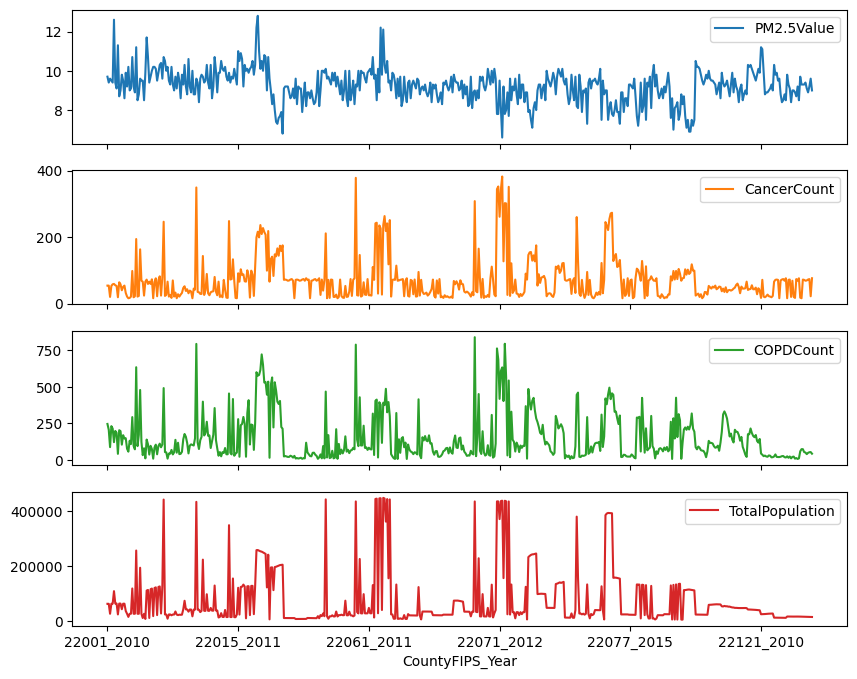

,County,PM2.5Value,Year,CancerRate,CancerCount,TotalPopulation,COPDCount
CountyFIPS_Year,,,,,,,
22001_2010,ACADIA,9.7,2010,78.9,54.000000,61876,246.0
22001_2011,ACADIA,9.4,2011,80.9,54.000000,61872,206.0
22003_2010,ALLEN,9.6,2010,73.8,20.000000,25704,87.0
22001_2012,ACADIA,9.5,2012,77.6,53.000000,62007,231.0
22001_2013,ACADIA,9.4,2013,86,58.000000,62310,214.0
...,...,...,...,...,...,...,...
22127_2015,WINN,9.1,2015,^,69.500000,14646,39.0
22127_2016,WINN,8.9,2016,^,72.300000,14539,48.0
22127_2017,WINN,9.2,2017,^,73.625000,14355,52.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Replace 'Suppressed', '^', and NaN with NaN in 'COPDCount' column
df['COPDCount'] = df['COPDCount'].replace(['Suppressed', '^', np.nan], pd.NA)

# Replace 'Suppressed', '^', and NaN with NaN in 'CancerCount' column
df['CancerCount'] = df['CancerCount'].replace(['^', np.nan], pd.NA)

# Convert columns to numeric
df['COPDCount'] = pd.to_numeric(df['COPDCount'], errors='coerce')
df['CancerCount'] = pd.to_numeric(df['CancerCount'], errors='coerce')

# Impute missing values in 'COPDCount' and 'CancerCount' using the mean value by FIPS code
df['COPDCount'] = df.groupby('Year')['COPDCount'].transform(lambda x: x.fillna(x.mean()))
df['CancerCount'] = df.groupby('Year')['CancerCount'].transform(lambda x: x.fillna(x.mean()))


# Set the index inplace
df.set_index('CountyFIPS_Year', inplace=True)

# Plotting all columns (including the new columns)
df[['PM2.5Value', 'CancerCount', 'COPDCount', 'TotalPopulation']].plot(subplots=True)
plt.show()

df
